<a href="https://colab.research.google.com/github/JF11579/CensusData/blob/master/RealEstate_Month_Over_Month.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A look at Glen cove both medium and short term.

Set up

In [67]:
options(scipen = 999)

Libraries

In [68]:
library(tidyverse)

In [69]:
library(ggplot2)

In [70]:
library(lubridate)

Import data

In [ ]:
GlenCove_Jan2019 <- read.csv("/content/Glen_Cove_Jan_2019_June_2020.csv",stringsAsFactors = FALSE)
head(GlenCove_Jan2019)

In [ ]:
GlenCove_June_3 <- read.csv("/content/Glen_Cove_June_3_2020ToAprol2020.csv",stringsAsFactors = FALSE)
head(GlenCove_June_3)

Stack dataframes 

In [105]:
# You can supply data frames as arguments:
GlenCove<-bind_rows(GlenCove_Jan2019 ,GlenCove_June_3 )

In [106]:
dim(GlenCove)

# Since January 2019 approximately 661 home have come on to the mkt. 
# We are ignoring those listed multiple times either 
# expired and re-listed or flipped.

[1] 661  26

In [74]:
head(GlenCove,3)

,St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,Total.Taxes,LSC,TOM,ListDate,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>
1,8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,16626.68,CL,N,1/03/2019,7/02/2019,5/01/2019,8/21/2019,NA,117,3090147
2,100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,0.00,CL,N,1/11/2019,10/29/2020,2/02/2019,9/22/2020,NA,257,3092493
3,9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,13333.90,CL,N,1/19/2019,7/19/2019,3/02/2019,4/18/2019,NA,42,3094630


In [107]:
#as.Date(GlenCove$ContDate, format = "%m/%d/%Y")
GlenCove$ContDate <- mdy(GlenCove$ContDate)

In [76]:
head(GlenCove,3)

,St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,Total.Taxes,LSC,TOM,ListDate,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<lgl>,<int>,<chr>
1,8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,16626.68,CL,N,1/03/2019,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147
2,100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,0.00,CL,N,1/11/2019,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493
3,9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,13333.90,CL,N,1/19/2019,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630


Now converted to date.

Now extract month and year

In [108]:
GlenCove$Year_month <- format(as.Date(GlenCove$ContDate) , "%Y-%m")

In [170]:
head(GlenCove,3)

,St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,Total.Taxes,LSC,TOM,ListDate,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<lgl>,<int>,<chr>
1,8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,16626.68,CL,N,1/03/2019,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147
2,100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,0.00,CL,N,1/11/2019,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493
3,9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,13333.90,CL,N,1/19/2019,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630


In [109]:
GlenCove<- GlenCove %>%
                mutate(ContDate = ymd(ContDate) , month = month(ContDate), year= year(ContDate))

In [78]:
head(GlenCove, 3)

,St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,TOM,ListDate,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,month,year
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<date>,<chr>,<lgl>,<int>,<chr>,<dbl>,<dbl>
1,8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,N,1/03/2019,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147,5,2019
2,100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,N,1/11/2019,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493,2,2019
3,9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,N,1/19/2019,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630,3,2019


In [110]:
GlenCove$month <- as.factor(GlenCove$month)

In [111]:
GlenCove$year <- as.factor(GlenCove$year)

In [81]:
head(GlenCove,3)

,St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,TOM,ListDate,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,month,year
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<date>,<chr>,<lgl>,<int>,<chr>,<fct>,<fct>
1,8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,N,1/03/2019,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147,5,2019
2,100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,N,1/11/2019,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493,2,2019
3,9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,N,1/19/2019,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630,3,2019


Create a another new column this one Year_month

In [112]:
GlenCove$Year_month <- format(as.Date(GlenCove$ContDate) , "%Y-%m")

In [83]:
head(GlenCove,3)

,St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,ListDate,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,month,year,Year_month
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<date>,<chr>,<lgl>,<int>,<chr>,<fct>,<fct>,<chr>
1,8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,1/03/2019,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147,5,2019,2019-05
2,100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,1/11/2019,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493,2,2019,2019-02
3,9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,1/19/2019,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630,3,2019,2019-03


Covert new Year_month to factor

In [113]:
GlenCove$Year_month <- as.factor(GlenCove$Year_month)

In [85]:
head(GlenCove,3)

,St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,ListDate,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,month,year,Year_month
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<date>,<chr>,<lgl>,<int>,<chr>,<fct>,<fct>,<fct>
1,8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,1/03/2019,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147,5,2019,2019-05
2,100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,1/11/2019,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493,2,2019,2019-02
3,9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,1/19/2019,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630,3,2019,2019-03


GROUPING DATA

In [114]:
GlenCove<- GlenCove %>%
                group_by(Year_month) %>%
                add_tally()

In [87]:
head(GlenCove,5)

St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,month,year,Year_month,n
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<date>,<chr>,<lgl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>
8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147,5,2019,2019-05,14
100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493,2,2019,2019-02,11
9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630,3,2019,2019-03,9
27,,Athem,Drive,,Glen Cove,11542,950000,900000,Condo,⋯,7/31/2019,2019-07-15,7/15/2019,NA,173,3095014,7,2019,2019-07,24
32,,Pearsall,,3L,Glen Cove,11542,145000,143000,Co-op,⋯,10/09/2019,2019-02-11,3/29/2019,NA,19,3095478,2,2019,2019-02,11


Let give that new column a better name than "n"

In [115]:
GlenCove<-rename(GlenCove, Yr_mo_Qty = n)

In [89]:
head(GlenCove,3)

St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,month,year,Year_month,Yr_mo_Qty
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<date>,<chr>,<lgl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>
8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147,5,2019,2019-05,14
100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493,2,2019,2019-02,11
9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630,3,2019,2019-03,9


## Graphing

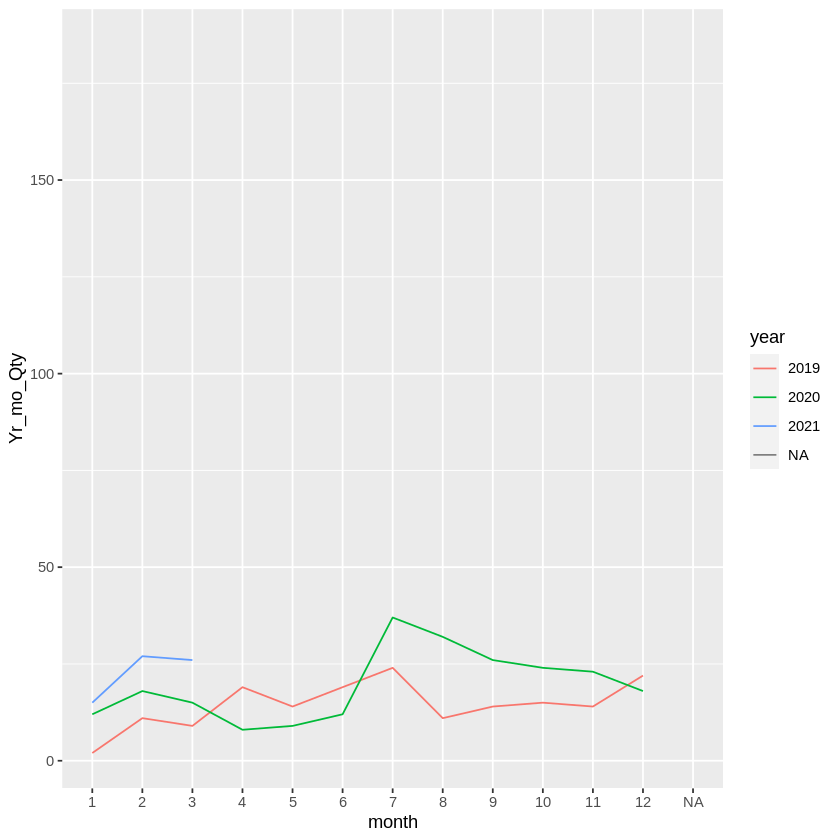

In [116]:
Year_Over_Year_line_chart <-ggplot(data= GlenCove, aes(x=month , y= Yr_mo_Qty , group = year , color = year))+
    geom_line()
    
Year_Over_Year_line_chart

Let us change that Y axis scale

Warning message:
“Removed 185 row(s) containing missing values (geom_path).”


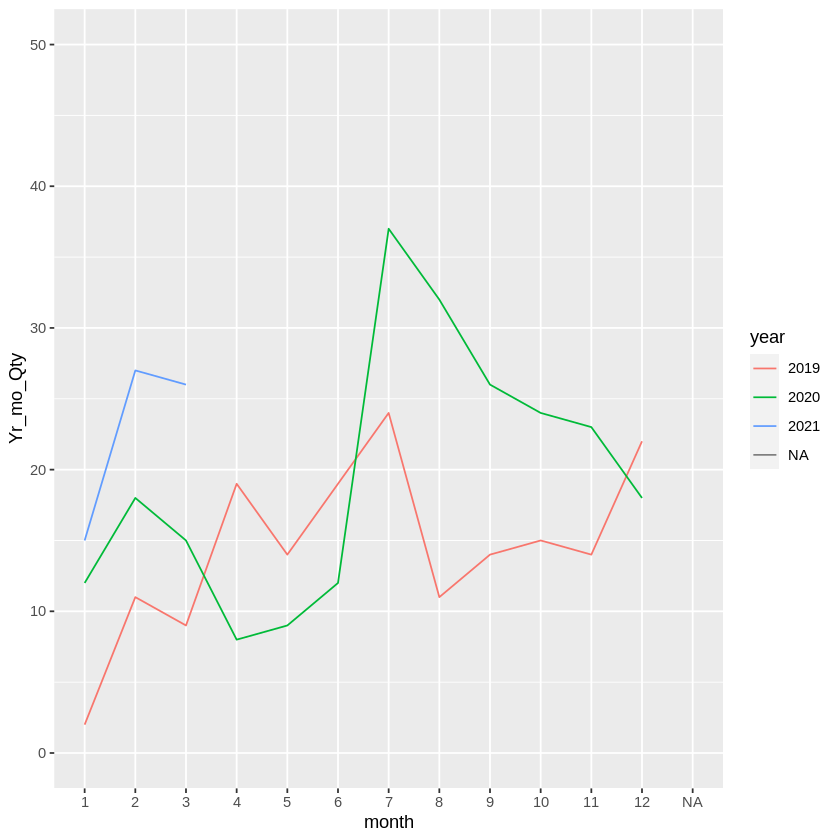

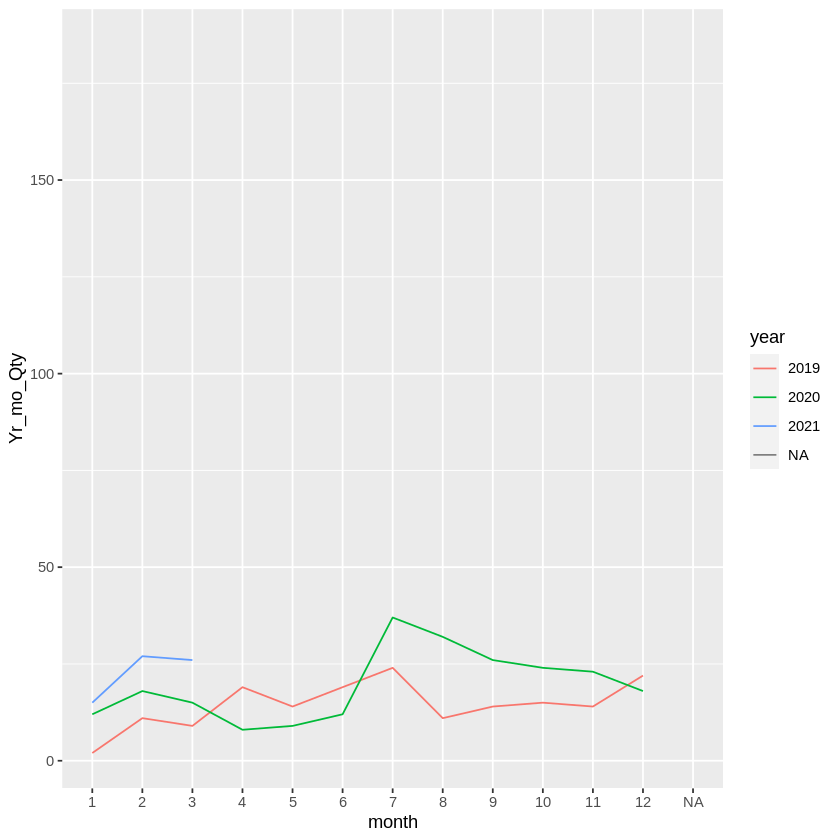

In [91]:
Year_Over_Year_line_chart+
    ylim(0,50)

Year_Over_Year_line_chart

Change Numbers to Months

Warning message:
“Removed 185 row(s) containing missing values (geom_path).”


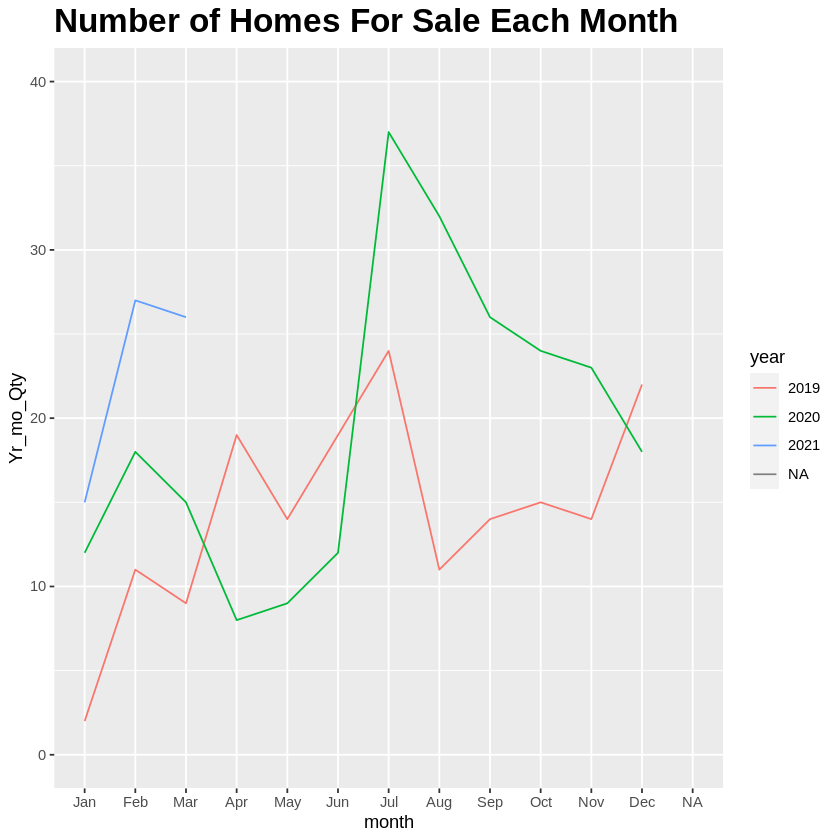

In [92]:
test_line_chart <-ggplot(data= GlenCove, aes(x=month , y= Yr_mo_Qty , group = year , color = year))+
    geom_line()+
     ylim(0,40)+
    scale_x_discrete(labels = month.abb)+
    ggtitle("Number of Homes For Sale Each Month")+
     theme(plot.title = element_text(size = 20, face = "bold"))
    
test_line_chart

# Multi Line Chart Avg Selling Price Year Over Year


In [96]:
GlenCove$TitleDate <- as.factor(GlenCove$TitleDate)

In [117]:
#GlenCove$ContDate <- mdy(GlenCove$ContDate)
GlenCove$TitleDate <- mdy(GlenCove$TitleDate)

In [126]:
head(GlenCove,3)

St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,Year_month,month,year,Yr_mo_Qty
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<date>,<date>,<lgl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>
8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,7/02/2019,2019-05-01,2019-08-21,NA,117,3090147,2019-05,5,2019,14
100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,10/29/2020,2019-02-02,2020-09-22,NA,257,3092493,2019-02,2,2019,11
9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,7/19/2019,2019-03-02,2019-04-18,NA,42,3094630,2019-03,3,2019,9


In [ ]:
Sold3 <- GlenCove %>%
        group_by(month2=floor_date(TitleDate,"month")) %>%
        mutate(AvgSale = mean(SellingPrice))
Sold3

In [141]:
head(Sold3,3)

St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,TitleDate,RentedDate,DOM,ML.,Year_month,month,year,Yr_mo_Qty,month2,AvgSale
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<date>,<lgl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>,<date>,<dbl>
8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,2019-08-21,NA,117,3090147,2019-05,5,2019,14,2019-08-01,608010.5
100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,2020-09-22,NA,257,3092493,2019-02,2,2019,11,2020-09-01,617169.4
9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,2019-04-18,NA,42,3094630,2019-03,3,2019,9,2019-04-01,608722.2


Extract Year from Date

In [ ]:
'''
test_line_chart <-ggplot(data= GlenCove, aes(x=month , y= Yr_mo_Qty , group = year , color = year))+
    geom_line()+
     ylim(0,40)+
    scale_x_discrete(labels = month.abb)+
    ggtitle("Number of Homes For Sale Each Month")+
     theme(plot.title = element_text(size = 20, face = "bold"))

'''

cluster bar graph

Warning message:
“Removed 259 rows containing missing values (geom_bar).”


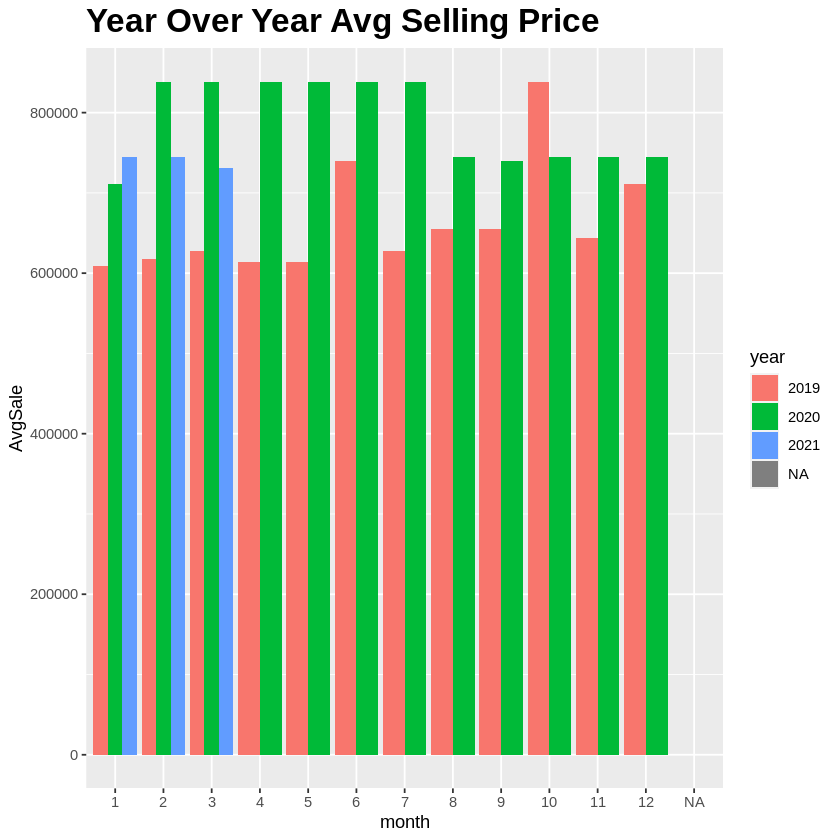

In [147]:
P1<- ggplot(Sold3 , aes(x=month , y= AvgSale, fill = year))+
    geom_bar(stat= "identity",position ="dodge")+
    ggtitle("Year Over Year Avg Selling Price")+
      theme(plot.title = element_text(size = 20, face = "bold"))
P1

In [ ]:
SoldPrice_Avg <- SoldPrice %>%
        group_by(month=floor_date(ContDate,"month"))%>%
        summarise(amount = mean(SellingPrice))
SoldPrice_Avg

In [41]:
# drop unwanted Year_mo column
SoldPrice<- GlenCove %>%
          select(SellingPrice, ContDate)
head(SoldPrice,3)

Adding missing grouping variables: `Year_month`



Year_month,SellingPrice,ContDate
<fct>,<int>,<date>
2019-05,750000,2019-05-01
2019-02,1195000,2019-02-02
2019-03,889500,2019-03-02


Don't know how to automatically pick scale for object of type function. Defaulting to continuous.

Don't know how to automatically pick scale for object of type function. Defaulting to continuous.

ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): group = year, colour = year. 
Did you mistype the name of a data column or forget to add after_stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(re

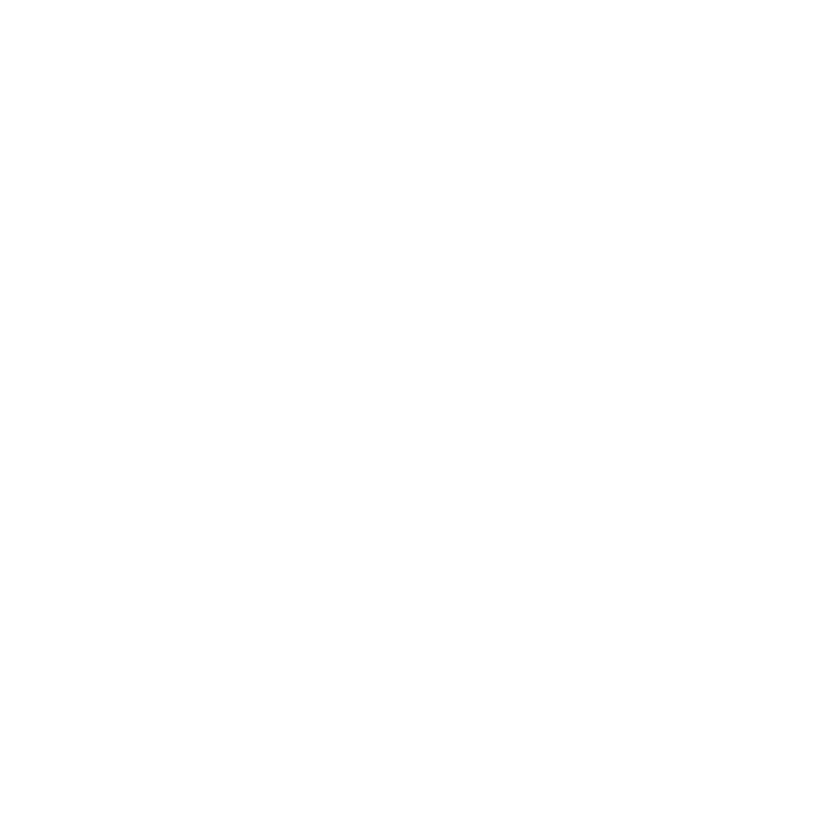

In [53]:
AvgSellingPrice <-ggplot(data= SoldPrice, aes(x= ContDate , y= SellingPrice , group = year , color = year))+
    geom_bar()+
    ggtitle("Average Selling Price")+
     theme(plot.title = element_text(size = 20, face = "bold"))
    
AvgSellingPrice

In [57]:
write.csv(GlenCove,"GlenCove2.csv")

In [ ]:
##############

Warning message:
“Removed 208 row(s) containing missing values (geom_path).”


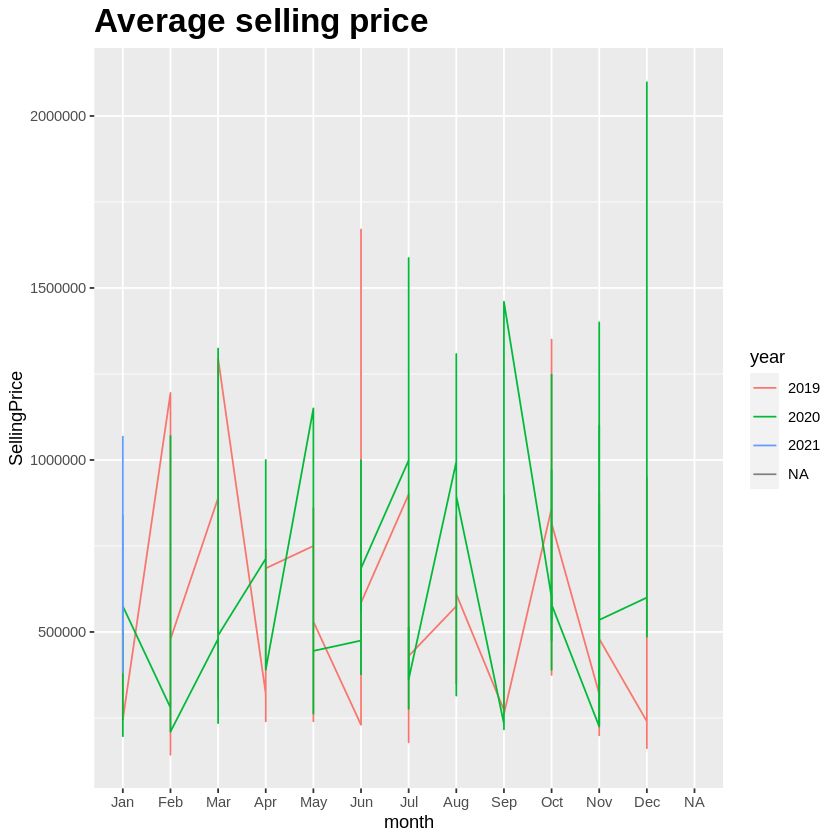

In [210]:
selling_price <-ggplot(data= GlenCove, aes(x=month , y= SellingPrice , group = year , color = year))+
    geom_line()+
    scale_x_discrete(labels = month.abb)+
    ggtitle("Average selling price")+
     theme(plot.title = element_text(size = 20, face = "bold"))
    
selling_price

Next Box chart selling price

Warning message:
“Removed 259 rows containing non-finite values (stat_boxplot).”


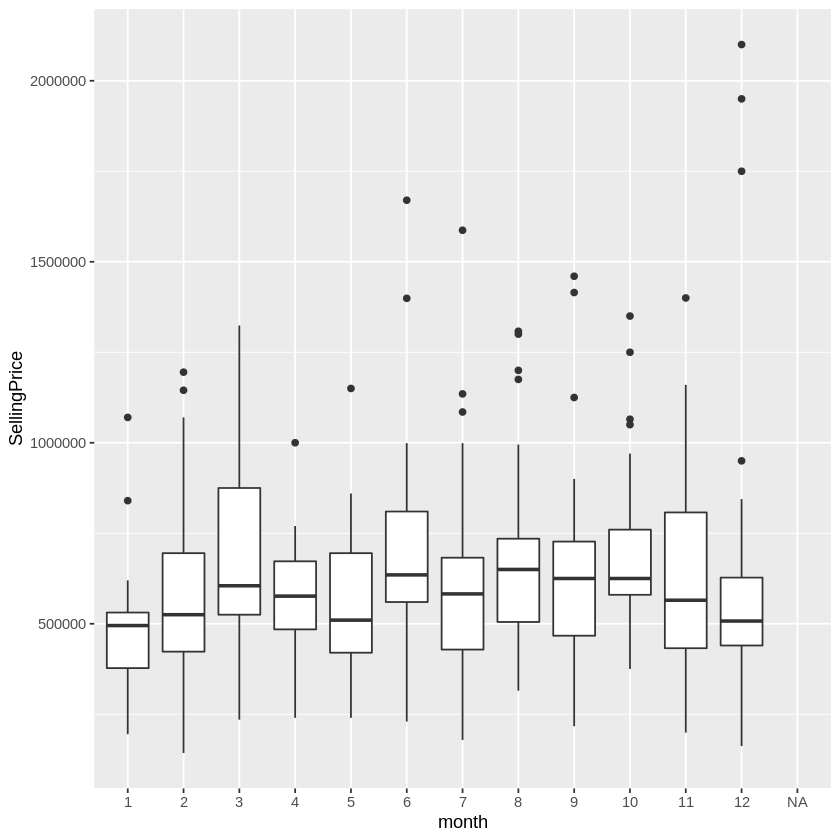

In [206]:
ggplot(GlenCove, aes(x= month , y=SellingPrice))+
          geom_boxplot()

In [24]:
head(GlenCove,3)

St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,Year_month,month,year,Yr_mo_Qty
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<date>,<chr>,<lgl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>
8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147,2019-05,5,2019,14
100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493,2019-02,2,2019,11
9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630,2019-03,3,2019,9


Select year month and selling price into new df

In [43]:
SoldPrice <-  subset(SoldPrice, select = -c(Year_month))
head(SoldPrice,3)

SellingPrice,ContDate
<int>,<date>
750000,2019-05-01
1195000,2019-02-02
889500,2019-03-02


In [44]:
head(SoldPrice,3)

SellingPrice,ContDate
<int>,<date>
750000,2019-05-01
1195000,2019-02-02
889500,2019-03-02


In [ ]:
# mean by month
#expenses %>% 
    group_by(month=floor_date(date, "month")) %>%
   #summarize(amount=mean(amount))

### JUNK

In [46]:
GlenCove

St..,Dir,Street.Name,Sfx,Unit..,Town,Zip,ListPrice,SellingPrice,X,⋯,ExpDate,ContDate,TitleDate,RentedDate,DOM,ML.,Year_month,month,year,Yr_mo_Qty
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<chr>,<date>,<chr>,<lgl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>
8,,Cardinal,Court,,Glen Cove,11542,800000,750000,Condo,⋯,7/02/2019,2019-05-01,8/21/2019,NA,117,3090147,2019-05,5,2019,14
100,,Garvies Point,Road,1241,Glen Cove,11542,1195000,1195000,Condo,⋯,10/29/2020,2019-02-02,9/22/2020,NA,257,3092493,2019-02,2,2019,11
9,,Watersedge,,,Glen Cove,11542,889500,889500,Condo,⋯,7/19/2019,2019-03-02,4/18/2019,NA,42,3094630,2019-03,3,2019,9
27,,Athem,Drive,,Glen Cove,11542,950000,900000,Condo,⋯,7/31/2019,2019-07-15,7/15/2019,NA,173,3095014,2019-07,7,2019,24
32,,Pearsall,,3L,Glen Cove,11542,145000,143000,Co-op,⋯,10/09/2019,2019-02-11,3/29/2019,NA,19,3095478,2019-02,2,2019,11
58U,,Glen Keith,Road,,Glen Cove,11542,230000,230000,Co-op,⋯,4/30/2019,2019-02-06,4/25/2019,NA,9,*1344517,2019-02,2,2019,11
30,,Pearsall,Avenue,1D,Glen Cove,11542,230000,230000,Co-op,⋯,7/15/2019,2019-06-24,9/16/2019,NA,137,3099085,2019-06,6,2019,19
32,,Pearsall,Avenue,4B,Glen Cove,11542,325000,320000,Co-op,⋯,1/01/2020,2019-04-12,5/17/2019,NA,61,3099973,2019-04,4,2019,19
34,,Pearsall,,4C,Glen Cove,11542,339000,339000,Co-op,⋯,2/21/2020,2019-05-21,7/23/2019,NA,88,3102900,2019-05,5,2019,14


In [34]:
(expenses <- data_frame(
  date=seq(as.Date("2016-01-01"), as.Date("2016-12-31"), by=1),
  amount=rgamma(length(date), shape = 2, scale = 20)))

date,amount
<date>,<dbl>
2016-01-01,40.993950
2016-01-02,29.524634
2016-01-03,40.140556
2016-01-04,12.483476
2016-01-05,60.749331
2016-01-06,52.493501
2016-01-07,52.611995
2016-01-08,39.686199
2016-01-09,10.453502


In [33]:
#sum by month
expenses %>% group_by(month=floor_date(date, "month")) %>%
   summarize(amount=sum(amount))

month,amount
<date>,<dbl>
2016-01-01,1206.1850
2016-02-01,1106.7143
2016-03-01,1016.9036
2016-04-01,1133.5754
2016-05-01,900.3132
2016-06-01,1141.3504
2016-07-01,1455.0063
2016-08-01,1291.5548
2016-09-01,1333.2676


In [32]:
# mean by month
expenses %>% group_by(month=floor_date(date, "month")) %>%
   summarize(amount=mean(amount))

month,amount
<date>,<dbl>
2016-01-01,44.36136
2016-02-01,38.10285
2016-03-01,33.49048
2016-04-01,35.75515
2016-05-01,45.19597
2016-06-01,45.95552
2016-07-01,43.96236
2016-08-01,31.76949
2016-09-01,36.06957
